### Fashion MNIST Classification

In [2]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Preprocess the data: Normalize the pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add channel dimension (since it's grayscale, use 1 channel)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the CNN model
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flattening the output from the convolutional layers
model.add(layers.Flatten())

# 4th Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# 5th Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))

# Output layer: 10 classes for the Fashion MNIST dataset
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model.save('fashion_mnist_cnn.h5')



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\sodiq.otunba\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,282 (399.54 KB)

 Trainable params: 102,282 (399.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.7343 - loss: 0.7075 - val_accuracy: 0.8713 - val_loss: 0.3616
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8805 - loss: 0.3272 - val_accuracy: 0.8856 - val_loss: 0.3092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8996 - loss: 0.2751 - val_accuracy: 0.8970 - val_loss: 0.2871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9084 - loss: 0.2467 - val_accuracy: 0.9005 - val_loss: 0.2815
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9195 - loss: 0.2208 - val_accuracy: 0.9059 - val_loss: 0.2625
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9258 - loss: 0.1957 - val_accuracy: 0.9050 - val_loss: 0.2734
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9346 - loss: 0.1777 - val_accuracy: 0.9058 - val_loss: 0.2638
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9386 -

Test accuracy: 0.9108999967575073


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


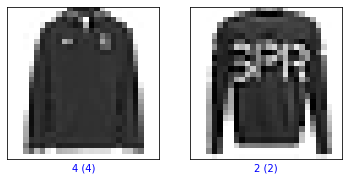

In [6]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Function to plot image with predicted label
def plot_image(index, predictions_array, true_label, img):
    true_label, img = true_label[index], img[index]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Show prediction for two random images
import random
index1 = random.randint(0, len(test_images)-1)
index2 = random.randint(0, len(test_images)-1)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index1, predictions[index1], test_labels, test_images)

plt.subplot(1,2,2)
plot_image(index2, predictions[index2], test_labels, test_images)

plt.show()


### Exploratory Data Analysis (EDA)

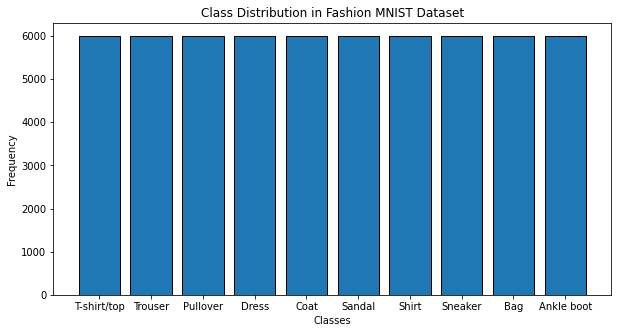

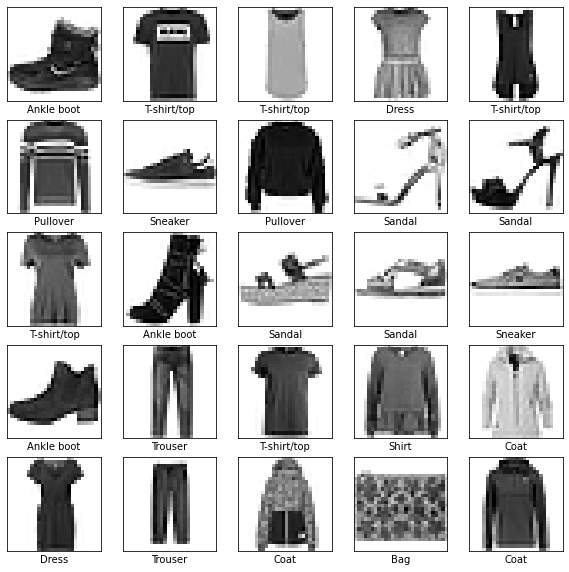

In [7]:
# Importing necessary libraries for EDA
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Plotting class distribution
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_class_distribution(labels):
    plt.figure(figsize=(10, 5))
    plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
    plt.xticks(ticks=np.arange(10), labels=class_names)
    plt.title("Class Distribution in Fashion MNIST Dataset")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(train_labels)

# Displaying some sample images with their class labels
def display_sample_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_sample_images(train_images, train_labels)


**Key observations:**

Class balance: The dataset appears to be relatively balanced, with each class having a similar number of samples.

Overall, the image suggests that the `Fashion MNIST` dataset is a well-curated dataset with a diverse range of clothing items represented. This makes it suitable for training and evaluating machine learning models for image classification tasks related to fashion and apparel.

### Feature Engineering
In this case, we don't have tabular features to engineer directly, but for image data, feature engineering can include transformations such as data augmentation (flipping, rotating, cropping, etc.) to improve generalization.

We can add image augmentation using Keras' `ImageDataGenerator`

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation to training data
datagen.fit(train_images.reshape((train_images.shape[0], 28, 28, 1)))


 ### Feature Selection
Feature selection for CNNs typically involves choosing the right layers or hyperparameters rather than dropping features explicitly like in tabular data. 

However, we could experiment with selecting channels (like grayscale vs. RGB) or tuning hyperparameters (like filter sizes or pooling layers).

For now, we’ll consider dimensionality reduction techniques like `Principal Component Analysis (PCA)` if we were handling tabular data derived from features. Since we are working with `CNNs`, this step may not apply directly here.

### Organizing Feature Engineering and Model Training in a Class

For proper organization and code reusability. I'll create a class for the ML model.

In [15]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape images to add channel dimension (28x28x1 for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

class FashionMNISTModel(BaseEstimator, TransformerMixin):
    def __init__(self, epochs=10):
        self.epochs = epochs
        self.model = None

    def fit(self, X, y=None):
        # Data Augmentation
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        
        # Build CNN model
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(64, activation='relu'))
        self.model.add(layers.Dense(128, activation='relu'))
        self.model.add(layers.Dense(10, activation='softmax'))

        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model using the data generator and manual validation data
        self.model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                       validation_data=(X_val, y_val), 
                       epochs=self.epochs)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def score(self, X, y):
        _, acc = self.model.evaluate(X, y)
        return acc

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6272 - loss: 1.0019 - val_accuracy: 0.7900 - val_loss: 0.5334
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7789 - loss: 0.5702 - val_accuracy: 0.8247 - val_loss: 0.4745
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8128 - loss: 0.4935 - val_accuracy: 0.8547 - val_loss: 0.4002
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8331 - loss: 0.4498 - val_accuracy: 0.8559 - val_loss: 0.3914
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8401 - loss: 0.4222 - val_accuracy: 0.8610 - val_loss: 0.3600
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8488 - loss: 0.3968 - val_accuracy: 0.8708 - val_loss: 0.3441
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8581 - loss: 0.3817 - val_accuracy: 0.8789 - val_loss: 0.3313
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8589 -

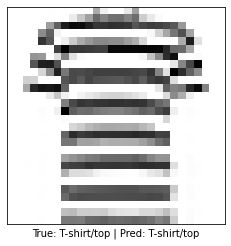

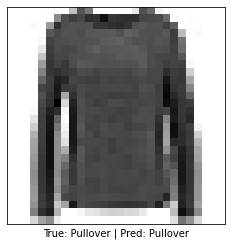

In [19]:

# Instantiate and train the model
fashion_mnist_model = FashionMNISTModel(epochs=10)

# Fit the model
fashion_mnist_model.fit(X_train, y_train)

# Test the model and print accuracy
print(f"\n Test accuracy: {(fashion_mnist_model.score(test_images, test_labels) *100):,.2f} %")

# Make predictions for two random images
import random
index1 = random.randint(0, len(test_images)-1)
index2 = random.randint(0, len(test_images)-1)
predictions = fashion_mnist_model.predict(test_images)

# Plotting predictions
def plot_prediction(img, true_label, pred_label):
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"True: {class_names[true_label]} | Pred: {class_names[pred_label]}")
    plt.show()

plot_prediction(test_images[index1], test_labels[index1], predictions[index1])
plot_prediction(test_images[index2], test_labels[index2], predictions[index2])


### Observation

The drop in test accuracy from 91% to 88% after introducing data augmentation (feature engineering) suggests a few potential causes. Here's what we can deduce:

1. **Overfitting in the Original Model:**
- In the original model (without augmentation), the model may have been overfitting to the training data. Overfitting occurs when the model learns the training data too well, including noise and irrelevant details, which negatively impacts its ability to generalize to new data (test set).
- The higher accuracy in the non-augmented model could have been due to this overfitting. Data augmentation generally helps to reduce overfitting by generating new, slightly modified training examples, forcing the model to generalize better.

2. **Too Aggressive Augmentation:**
- The augmentation parameters introduced (rotation, zoom, shifts) may have been too aggressive for the Fashion MNIST dataset. While augmentation is useful for more complex images (e.g., natural scenes or object detection), Fashion MNIST contains simpler, grayscale clothing images. Heavy augmentation might distort the images in ways that are not representative of real-world variations, causing the model to struggle with distinguishing between augmented classes and the actual test data.

### Recommendation

**Reducing the Intensity of Data Augmentation:**

- By reducing the strength of augmentation to make it more reasonable for the Fashion MNIST dataset. For instance:
    Reduce the rotation_range (e.g., from 15 to 5 degrees).
- Reduce or remove horizontal_flip, since flipping might not make sense for certain clothing items.
- Scale back the zoom_range and width_shift_range/height_shift_range.

**Regularization Techniques:**

- To prevent overfitting without relying solely on augmentation, we can use regularization techniques like dropout layers or weight decay (L2 regularization) in the model.